In [2]:
from math import *
import numpy as np
import sympy as sy
from numpy import cross
from sympy import integrate,diff
mm=0.001

知识重点
---
1. $\sigma_x,\sigma_y,\tau_{xy}$默认正方向  
&emsp;   

2. 薄壁+水压(因为水压产生的材料内正应力永远是正的)  
$\sigma_1=\frac{P \cdot r}{t_{壁厚}}=\frac{P \cdot r_{内}}{r_{外}-r_{内}}  $   
$\sigma_2=\frac{P \cdot r}{2 \cdot t_{壁厚}}=\frac{P \cdot r_{内}}{2 \cdot (r_{外}-r_{内})}  $   
&emsp;   

3. 基本公式     
$I=\int{\rho \cdot y^2 dr}$  
$J=\int{\rho \cdot r^2 dA}=2 \cdot I$   
&emsp;  
$\sigma=\frac{F}{S}$  &emsp;&emsp;   正力产生的应力  
$\sigma=\frac{-M \cdot y}{I}$&emsp; 力矩产生的应力  
&emsp;  
$\tau=\frac{V \cdot Q}{I \cdot t}$ &emsp; 剪切力产生的剪应力  
$\tau=\frac{T_{力矩} \cdot r}{J}=\frac{M \cdot r}{J}$ &emsp; 力矩产生的剪切力  因为扭转产生   
&emsp;  
注意 J 和 I 是有区别的


题目列表
---
1. 球框
2. 水管

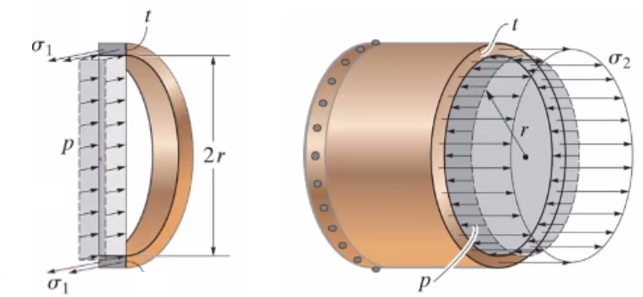

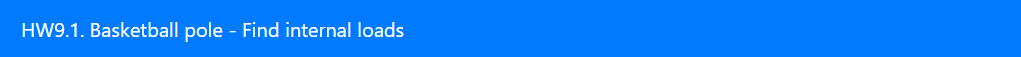

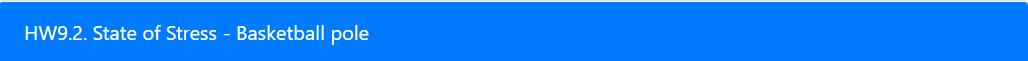

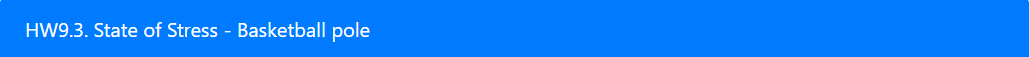

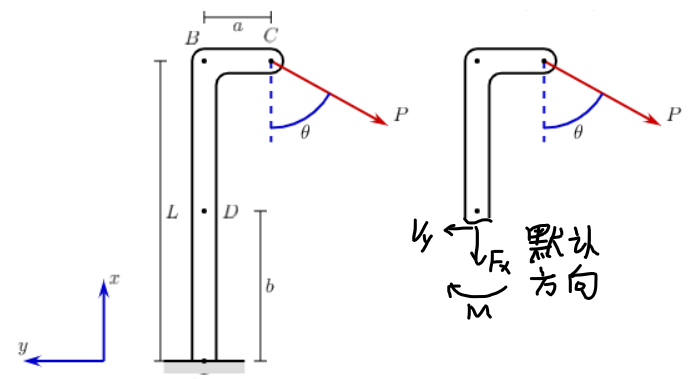

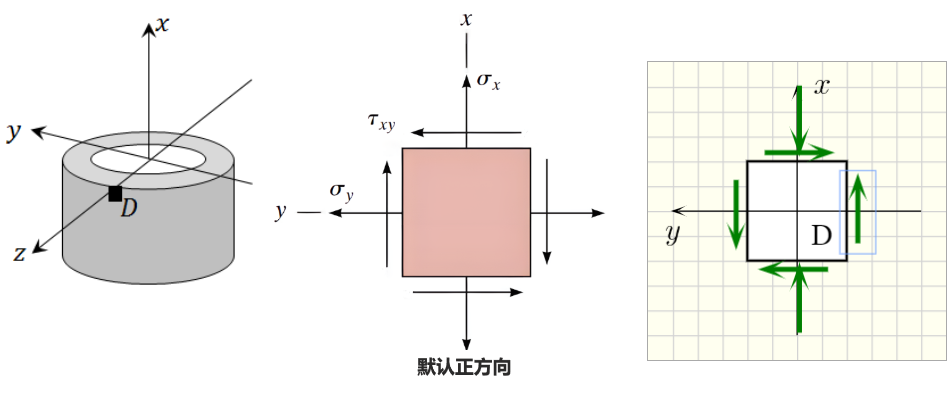

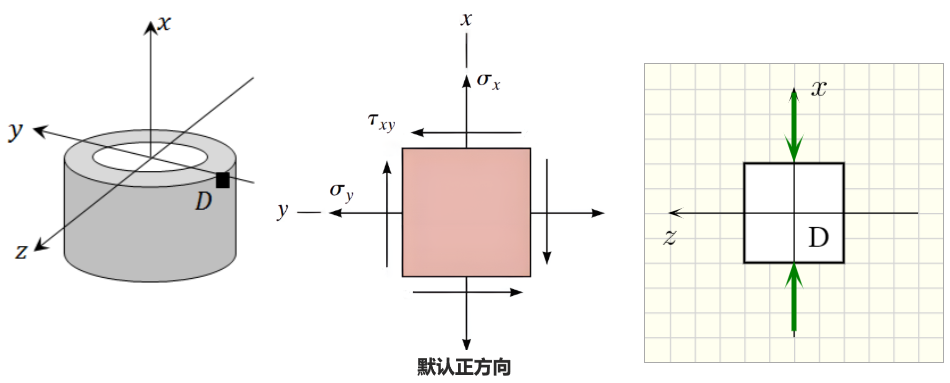

画图题说明  
---
因为$\sigma_x$算出来是负的，所以方向与正方向相反  
---
因为$\tau_{xy}$算出来是负的，所以方向与正方向相反，然后各个$\tau$头接头，尾接尾
---

In [10]:
#####################复制部分
a = 656; 
b = 1493;
L = 2986;
do = 85;
di = 45;
P = 896; 
theta = 54;   
#####################单位转化
a*=mm;b*=mm;L*=mm;do*=mm;di*=mm;theta=theta*pi/180;ro=do/2;ri=di/2
#####################
Vy=P*sin(theta)
Fx=-P*cos(theta);r=np.array([a,L-b]);P=np.array([P*sin(theta),-P*cos(theta)])
Mz=cross(r,P)

S=pi*(ro**2-ri**2)
I=pi/4*(ro**4-ri**4) #这里注意转动惯量计算！！！对x还是对z旋转

sigmax1_1=-abs(Fx/S)/1000
sigmax_D1=sigmax1_1                  #KPa

sigma2_1=-abs(Fx/S)/1000000
sigma2_2=-abs(Mz*ro/I)/1000000
sigmax_D2=sigma2_1+sigma2_2  #MPa
#注意❗❗❗❗
#sigmax1仅由P产生
#sigmax2除了P以外，M也产生了sigma

sigmay1=0/S/1000   #因为y方向的正压力=0，所以y的正应力为0
sigmaz2=0/S/1000   #因为z方向的正压力=0，所以z的正应力为0

t=do-di
m1=0.5*pi*ro**2
m2=-0.5*pi*ri**2
y1=4*ro/3/pi
y2=4*ri/3/pi
ybar=(m1*y1+m2*y2)/(m1+m2)
Q=(m1+m2)*ybar

#剪应力命名方法，以tauxy为例，x代表截面法向量方向，y代表剪切力默认正方向
tauxy=-Vy*Q/(I*t)/1000  #注意这里用的是-Vy因为取得是截面的下半部分，是反作用力
tauxz=0*Q/(I*t)/1000

print('Vy=',Vy),print('Fx=',Fx),print("Mz=",Mz/1000)
print('sigmax_D1=',sigmax_D1),print('sigmax_D2=',sigmax_D2)
print('sigmay1=',sigmay1),print('sigmaz2=',sigmaz2)
print('tauxy =',tauxy),print('tauxz=',tauxz)

Vy= 724.8792269599529
Fx= -526.6555860540559
Mz= -1.4277307503026704
sigmax_D1= -128.95359973455697
sigmax_D2= -25.828192900221865
sigmay1= 0.0
sigmaz2= 0.0
tauxy = -334.51156000724194
tauxz= 0.0


(None, None)

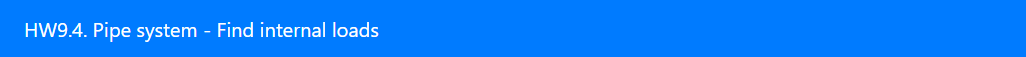

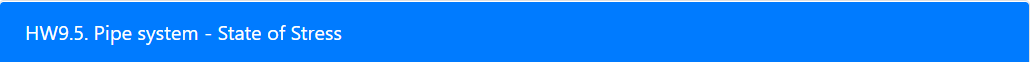

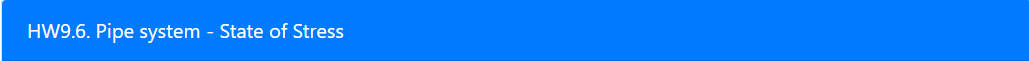

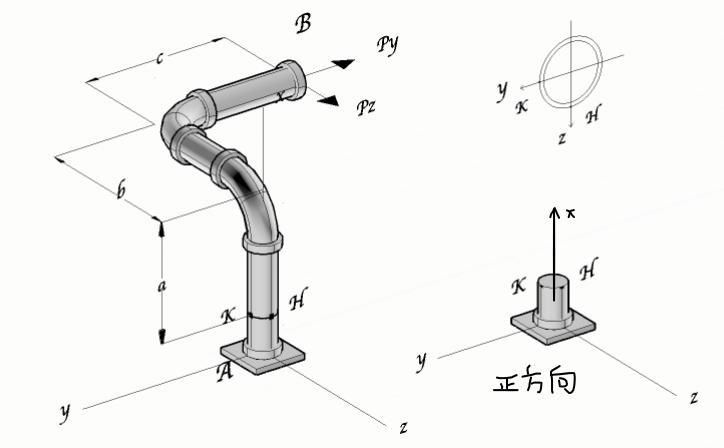

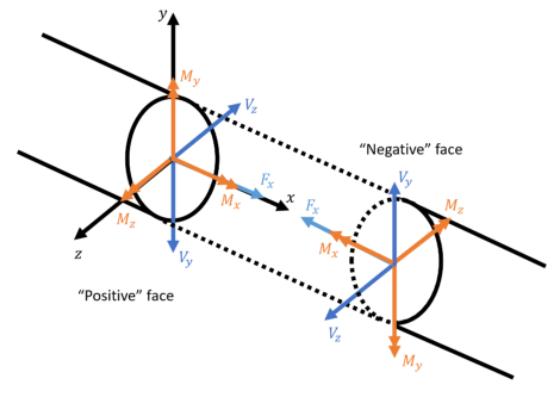
❓如何判断截面是positive face还是negative face  
---
根据界面法向量判断，如果界面法向量与x轴(仅针对上图)方向一致，就是postive，反之为negative
❓如三维物体内力默认正方向  
---
根据是positive还是negative face，然后对照图里的方向看

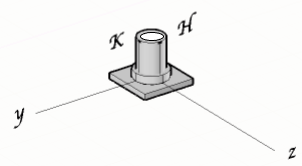

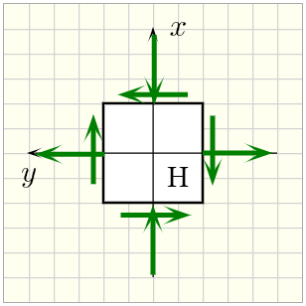

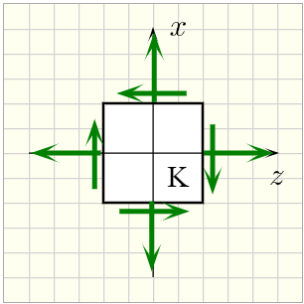

In [16]:
#本题重点
#三维空间中各个力的符号规则
#####################复制部分
a = 347; 
b = 232;
c = 263;
Pz = 483; 
Py = 304; 
p = 554;
do = 85;
di = 45;
#####################单位转化
a*=mm;b*=mm;c*=mm;do*=mm;di*=mm;ro=do/2;ri=di/2;p*=1000
#####################基本力+力矩计算过程

Vy=Py          #与y轴同向→+ 
Vz=-Pz         #与z轴反向→-
Fx=0
Tx=-Pz*c-Py*b  #与x轴反向→-
My=-Pz*a       #与y轴反向→-  
Mz=-Py*a       #与z轴同向→- 

#####################基本量计算
S=pi*(ro**2-ri**2)
I=pi/4*(ro**4-ri**4)
J=pi/2*(ro**4-ri**4)
t=do-di

#计算Q
m1=0.5*pi*ro**2
m2=-0.5*pi*ri**2
y1=4*ro/3/pi     #半圆的质心高度公式
y2=4*ri/3/pi
ybar=(m1*y1+m2*y2)/(m1+m2)
Q=(m1+m2)*ybar




#单列水的2种sigma
sigma_water1=(p*ri/(do-di))
sigma_water2=(p*ri/(ro-ri))

#❗❗❗❗M·y的符号问题
sigma_xH=(sigma_water1+My*ro/I)/1e6 #水压产生(永远是正的)+力矩产生   注意My的符号问题❗❗❗❗❗
sigma_xK=(sigma_water1-Mz*ro/I)/1e6 #水压产生(永远是正的)+力矩产生   注意Mz的符号问题❗❗❗❗❗

#以下两个sigma都是由水💧产生的正应力sigma1
sigmay=sigma_water2/1e6
sigmaz=sigma_water2/1e6

#计算H点tau_xy
tauM_H=abs(Tx*ro/J)
tauV_H=abs(Vy*Q/(I*t))
tauxy=(+tauM_H-tauV_H)/1e6   #tauM_H=＋，tauV_H=－ ❗❗❗❗❗❗

#计算K点tau_xz
tauM_K=abs(Tx*ro/J)
tauV_K=abs(Vz*Q/(I*t))
tauxz=(-tauM_K+tauV_K)/1e6   #tauM_K=－，tauV_K=＋ ❗❗❗❗❗❗

print(Vy,Vz,Fx,Tx,My,Mz)
print('sigma_xH=',sigma_xH),print ('sigma_xK=',sigma_xK)
print('sigmay  =',sigmay),print('sigmaz  =',sigmaz)
print('tauxy   =',tauxy ),print('tauxz   =',tauxz )

304 -483 0 -197.55700000000002 -167.60100000000003 -105.48800000000001
sigma_xH= -2.705203071460861
sigma_xK= 2.2104153389732955
sigmay  = 0.6232499999999999
sigmaz  = 0.6232499999999999
tauxy   = 1.6377314086235344
tauxz   = -1.5551278975636096


(None, None)